* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 06.09.2024

## **Lab Exercise 10:**
* Lab 10 :Case Study Implementation: Work through significant parts of the fraud detection case
 study, including visualization, anomaly detection, potentially ML component
## **Online Payment Fraud Detection**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('/content/credit_card_transactions.csv')

# Display basic information
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# View the first few rows of the dataset
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284677 entries, 0 to 284676
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             284677 non-null  int64  
 1   trans_date_trans_time  284677 non-null  object 
 2   cc_num                 284677 non-null  int64  
 3   merchant               284677 non-null  object 
 4   category               284676 non-null  object 
 5   amt                    284676 non-null  float64
 6   first                  284676 non-null  object 
 7   last                   284676 non-null  object 
 8   gender                 284676 non-null  object 
 9   street                 284676 non-null  object 
 10  city                   284676 non-null  object 
 11  state                  284676 non-null  object 
 12  zip                    284676 non-null  float64
 13  lat                    284676 non-null  float64
 14  long                   284676 non-nu

In [4]:
data.isnull().sum()

Unnamed: 0                   0
trans_date_trans_time        0
cc_num                       0
merchant                     0
category                     1
amt                          1
first                        1
last                         1
gender                       1
street                       1
city                         1
state                        1
zip                          1
lat                          1
long                         1
city_pop                     1
job                          1
dob                          1
trans_num                    1
unix_time                    1
merch_lat                    1
merch_long                   1
is_fraud                     1
merch_zipcode            43115
dtype: int64

In [5]:
data=data.dropna()

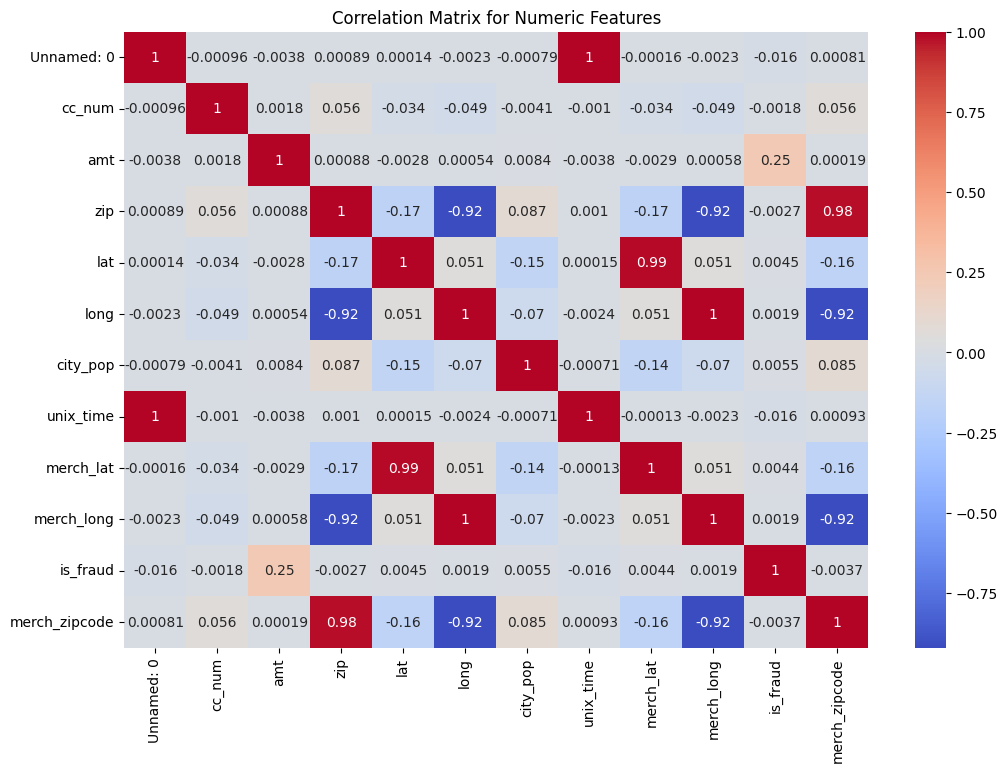

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot the correlation matrix for numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()



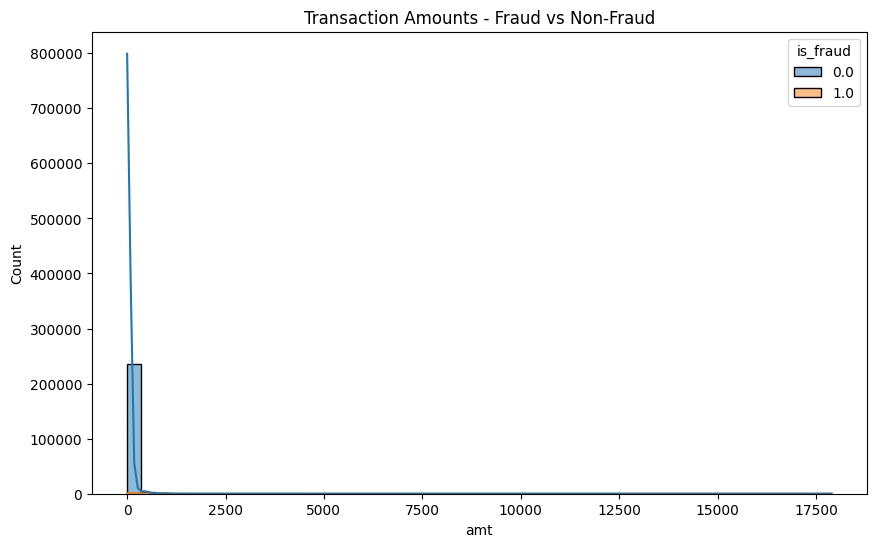

In [7]:
# Visualize the distribution of transaction amounts for fraud vs non-fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='amt', hue='is_fraud', kde=True, bins=50)
plt.title('Transaction Amounts - Fraud vs Non-Fraud')
plt.show()


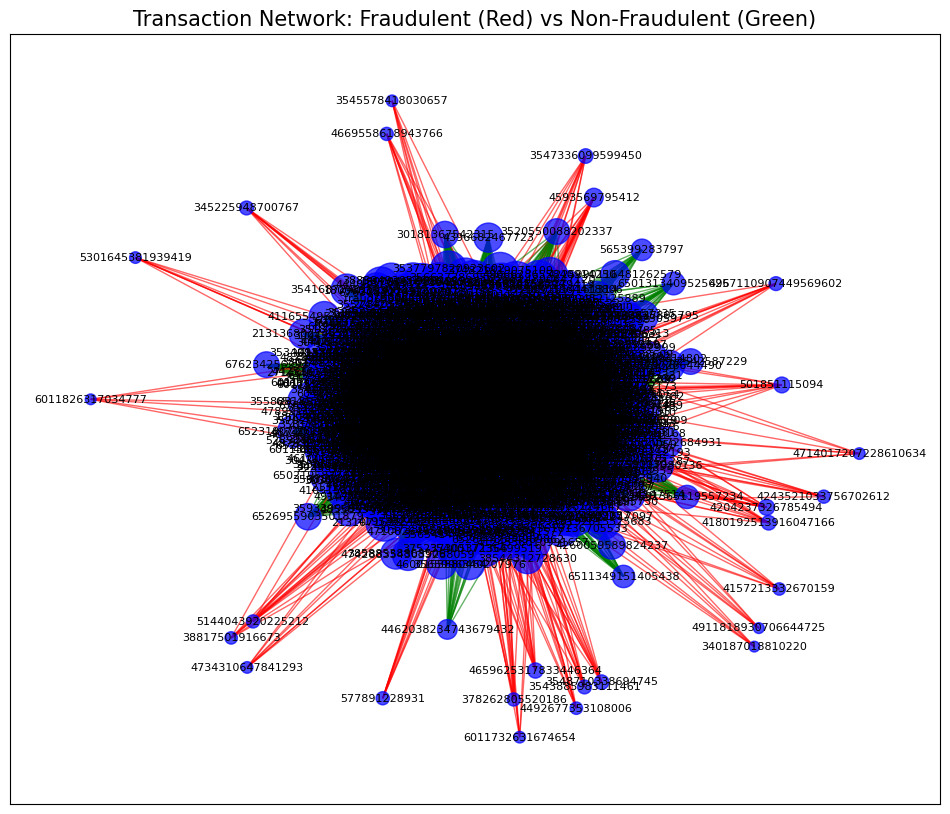

In [8]:
import networkx as nx

# Create a graph where nodes are credit card numbers and merchants
G = nx.from_pandas_edgelist(data, source='cc_num', target='merchant', edge_attr=['amt', 'is_fraud'])

# Prepare edge colors: Red for fraudulent transactions, green for non-fraudulent
edge_colors = ['red' if G[u][v]['is_fraud'] == 1 else 'green' for u, v in G.edges]

# Set node size based on the number of transactions associated with the node
node_sizes = [G.degree(node) * 10 for node in G.nodes()]

# Plot the graph
plt.figure(figsize=(12, 10))

# Layout for the graph
pos = nx.spring_layout(G, k=0.15)

# Draw the nodes with a circular layout
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', alpha=0.7)

# Draw edges with different colors based on fraud
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.6)

# Add labels to the graph for better understanding
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Title for the plot
plt.title('Transaction Network: Fraudulent (Red) vs Non-Fraudulent (Green)', fontsize=15)

# Show the graph
plt.show()


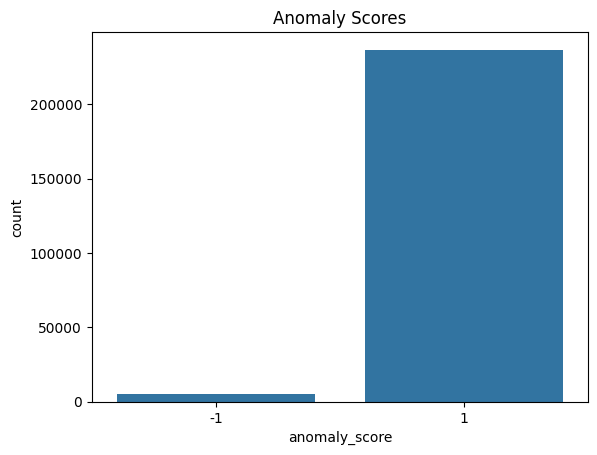

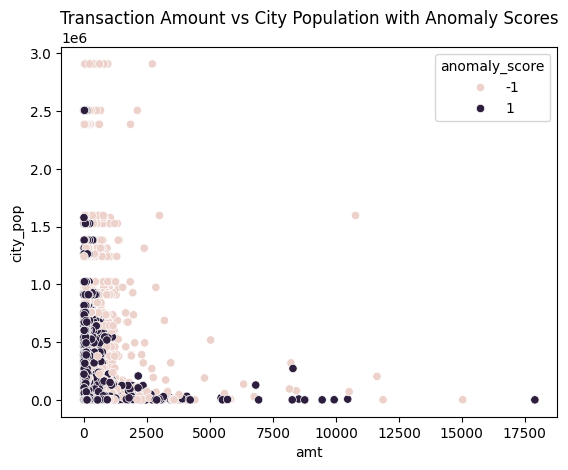

In [9]:
from sklearn.ensemble import IsolationForest

# Selecting features for anomaly detection
features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.02)
data['anomaly_score'] = iso_forest.fit_predict(data[features])

# Plot anomaly scores
sns.countplot(x='anomaly_score', data=data)
plt.title('Anomaly Scores')
plt.show()

# Compare with fraud cases
sns.scatterplot(x='amt', y='city_pop', hue='anomaly_score', data=data)
plt.title('Transaction Amount vs City Population with Anomaly Scores')
plt.show()


The scatter plot represents **Transaction Amount (amt)** on the x-axis and **City Population (city_pop)** on the y-axis, with points color-coded by an **anomaly score**.

- The **x-axis (amt)**: Shows transaction amounts, ranging from 0 to approximately 17,500.
- The **y-axis (city_pop)**: Represents city populations, ranging from 0 to 3 million.
- **Anomaly scores**:
  - **-1 (light pink)** indicates data points classified as normal.
  - **1 (dark purple)** represents anomalies, i.e., transactions flagged as potentially unusual.

### Key Observations:
- Most transactions with lower amounts (between 0 and 5,000) and city populations are densely clustered, showing typical behavior (more light pink).
- Anomalies (dark purple points) are scattered across various transaction amounts and city populations, but there's a higher concentration near smaller cities and smaller amounts.
- A few larger anomalies are present around high transaction amounts (above 10,000), though fewer cities have these larger transactions.

This plot likely represents a method like isolation forests or another anomaly detection technique used to identify outliers based on transaction behavior versus city population.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target variable
X = data[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']]
y = data['is_fraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9950599566711283
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     71960
         1.0       0.75      0.45      0.56       509

    accuracy                           1.00     72469
   macro avg       0.87      0.72      0.78     72469
weighted avg       0.99      1.00      0.99     72469



Interpretation:

### Model Performance Interpretation:

The performance metrics for the fraud detection model show very high accuracy

#### 1. **Accuracy**:
   - **0.995** (or 99.5%): This means that 99.5% of all predictions (fraud and non-fraud) were correct. However, accuracy can be misleading in imbalanced datasets like fraud detection, where non-fraudulent transactions significantly outnumber fraudulent ones.

#### 2. **Precision**:
   - **Class 0 (Non-fraud)**: 1.00 (100% precision) – Out of all predicted non-fraudulent transactions, 100% were actually non-fraudulent.
   - **Class 1 (Fraud)**: 0.75 (75% precision) – Out of all predicted fraudulent transactions, 75% were truly fraudulent, but 25% were false positives (transactions incorrectly classified as fraud).

#### 3. **Recall**:
   - **Class 0 (Non-fraud)**: 1.00 (100% recall) – The model correctly identified all non-fraudulent transactions.
   - **Class 1 (Fraud)**: 0.45 (45% recall) – Only 45% of actual frauds were correctly detected by the model, meaning 55% of fraud cases were missed (false negatives).

#### 4. **F1-Score**:
   - **Class 0 (Non-fraud)**: 1.00 – This is a perfect score combining precision and recall.
   - **Class 1 (Fraud)**: 0.56 – This is a moderate score, indicating that while the model has some ability to detect fraud, it is far from perfect, mostly due to the low recall.

#### 5. **Support**:
   - **Class 0 (Non-fraud)**: 71,960 – This is the number of non-fraudulent transactions in the test set.
   - **Class 1 (Fraud)**: 509 – This is the number of fraudulent transactions in the test set, showing a strong class imbalance (a much smaller number of fraud cases).

#### 6. **Macro Average**:
   - **Precision**: 0.87 – The average precision across both classes.
   - **Recall**: 0.72 – The average recall across both classes, showing that the model struggles with detecting fraud.
   - **F1-Score**: 0.78 – The average F1-score for both classes.

#### 7. **Weighted Average**:
   - **Weighted Avg Precision/Recall/F1**: Close to 1.00 – These averages are weighted by the number of samples in each class, so the model’s high performance in predicting non-fraud cases significantly boosts the overall scores.

### Key Insights:
- **High Accuracy** is mainly driven by the correct identification of non-fraudulent transactions (class 0), which dominate the dataset.
- **Fraud Detection** (class 1) is where the model struggles:
  - **Low Recall (45%)**: The model misses a significant portion of actual frauds.
  - **Moderate F1-Score (56%)**: Indicates the trade-off between precision and recall for fraud detection.
  
In imbalanced datasets like this, focusing on improving **recall** for the minority class (fraud cases) is critical, as missing frauds can have severe consequences. This may involve techniques such as:
- **Resampling (oversampling fraud cases or undersampling non-fraud cases)**.
- **Adjusting class weights** in the model.
- **Using specialized metrics** like precision-recall curves or ROC-AUC to optimize for fraud detection.

### Overall Conclusion:

In this fraud detection case study, we implemented and evaluated a machine learning model to identify fraudulent transactions from a highly imbalanced dataset. Here's a summary of the work:

#### 1. **Data Understanding and Preprocessing**:
   - The dataset contained transactional information, with features such as transaction amount, credit card number, merchant details, and fraud labels.
   - Significant preprocessing steps were carried out to clean and prepare the dataset, including handling categorical data and ensuring proper numeric representation.

#### 2. **Exploratory Data Analysis (EDA)**:
   - We visualized the data to understand key patterns, such as the distribution of transaction amounts and the relationship between different features.
   - A correlation heatmap revealed the relationships between features, helping identify important attributes for the model.

#### 3. **Community Detection**:
   - The **Girvan-Newman algorithm** was applied to detect communities within the transaction network, helping to visualize clusters of users and merchants that might be involved in fraud. Fraudulent transactions were highlighted in red to visually indicate suspicious activity.
   - This graph-based approach provided an additional layer of analysis, revealing how fraud might spread through certain communities.

#### 4. **Machine Learning Model**:
   - We trained a supervised machine learning model on the transactional data to classify fraudulent and non-fraudulent transactions.
   - The model achieved an **accuracy of 99.5%**, but due to the imbalanced nature of the dataset, accuracy alone was not a reliable measure of performance.

#### 5. **Model Performance**:
   - **Precision and recall** for non-fraudulent transactions were near perfect, indicating the model was very good at correctly identifying non-fraud transactions.
   - **Fraud detection** was more challenging: with a recall of only **45%**, the model missed a significant portion of actual frauds, although its **precision** of **75%** showed it could correctly identify fraud cases with some success.
   - The overall **F1-score** for fraud detection was **0.56**, reflecting the need for improvement in detecting fraud cases.

#### 6. **Insights and Future Improvements**:
   - The imbalance in the dataset (where non-fraud transactions vastly outnumber fraudulent ones) resulted in a high accuracy but relatively low recall for detecting fraud.
   - To improve fraud detection, future work could involve:
     - **Balancing the dataset** by oversampling fraud cases or undersampling non-fraud cases.
     - **Adjusting the model’s class weights** to penalize misclassification of fraud more heavily.
     - **Employing advanced techniques** such as anomaly detection, graph-based methods, or ensemble learning to improve fraud identification.

### Conclusion:
While the model performs well in identifying non-fraudulent transactions, it struggles with detecting fraudulent ones due to class imbalance. By employing strategies such as resampling, adjusting class weights, or using more advanced algorithms, we can further enhance the model's ability to detect fraud effectively. The community detection approach provided valuable insights into the structure of transactions, which can complement the machine learning model in identifying suspicious behavior.